In [1]:
%pip install scikit-learn==1.5.2
%pip install --upgrade xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ----------------------------------- ---- 9.7/11.0 MB 66.4 MB/s eta 0:00:01
   ---------------------------------------- 11.0/11.0 MB 54.9 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   - -------------------------------------- 5.8/150.0 MB 41.9 MB/s eta 0:00:04
   ----- ---------------------------------- 19.4/150.0 MB 56.0 MB/s eta 0:00:03
   -------- ------------------------------- 32.2/150.0 MB 57.6 MB/s eta 0:00:03
   ----------- ---------------------------- 44.0/150.0 MB 57.8 MB

In [2]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

# Load Dataset
---

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
# df = pd.read_csv('/kaggle/input/online-shoppers-purchasing-intention-dataset/online_shoppers_intention.csv')
df = pd.read_csv('../dataset/online_shoppers_intention.csv')
df

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


# Exploratory Data Analysis
---

In [6]:
df.shape

(12330, 18)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Administrative,12330.0,2.315166,3.321784,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12330.0,80.818611,176.779107,0.0,0.000000,7.500000,93.256250,3398.750000
Informational,12330.0,0.503569,1.270156,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12330.0,34.472398,140.749294,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12330.0,31.731468,44.475503,0.0,7.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12330.0,1194.746220,1913.669288,0.0,184.137500,598.936905,1464.157214,63973.522230
BounceRates,12330.0,0.022191,0.048488,0.0,0.000000,0.003112,0.016813,0.200000
ExitRates,12330.0,0.043073,0.048597,0.0,0.014286,0.025156,0.050000,0.200000
PageValues,12330.0,5.889258,18.568437,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12330.0,0.061427,0.198917,0.0,0.000000,0.000000,0.000000,1.000000


In [9]:
df.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [10]:
df.duplicated().sum()

np.int64(125)

In [11]:
categorical_cols = df.loc[:, (df.dtypes == 'object') | (df.dtypes == 'bool')].columns.tolist()
print(categorical_cols)
print('Counts :', len(categorical_cols))

numerical_cols = df.loc[:, (df.dtypes == 'int64') | (df.dtypes == float)].columns.tolist()
print(numerical_cols)
print('Counts :', len(numerical_cols))

['Month', 'VisitorType', 'Weekend', 'Revenue']
Counts : 4
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']
Counts : 14


In [12]:
print("UNIQUE VALUES IN CATEGORICAL COLUMNS")
print("="*50)

for col in categorical_cols:
    unique_values = df[col].unique()
    unique_count = df[col].nunique()
    
    print(f"\n{col}:")
    print(f"  Number of unique values: {unique_count}")
    print(f"  Unique values: {unique_values}")
    
    if unique_count > 10:
        print(f"  First 10 values: {unique_values[:10]}")
    
    print(f"  Value counts:")
    value_counts = df[col].value_counts()
    if len(value_counts) <= 10:
        for value, count in value_counts.items():
            print(f"    {value}: {count} ({count/len(df)*100:.1f}%)")
    else:
        print("    Top 5 most frequent:")
        for value, count in value_counts.head(5).items():
            print(f"    {value}: {count} ({count/len(df)*100:.1f}%)")

UNIQUE VALUES IN CATEGORICAL COLUMNS

Month:
  Number of unique values: 10
  Unique values: ['Feb' 'Mar' 'May' 'Oct' 'June' 'Jul' 'Aug' 'Nov' 'Sep' 'Dec']
  Value counts:
    May: 3364 (27.3%)
    Nov: 2998 (24.3%)
    Mar: 1907 (15.5%)
    Dec: 1727 (14.0%)
    Oct: 549 (4.5%)
    Sep: 448 (3.6%)
    Aug: 433 (3.5%)
    Jul: 432 (3.5%)
    June: 288 (2.3%)
    Feb: 184 (1.5%)

VisitorType:
  Number of unique values: 3
  Unique values: ['Returning_Visitor' 'New_Visitor' 'Other']
  Value counts:
    Returning_Visitor: 10551 (85.6%)
    New_Visitor: 1694 (13.7%)
    Other: 85 (0.7%)

Weekend:
  Number of unique values: 2
  Unique values: [False  True]
  Value counts:
    False: 9462 (76.7%)
    True: 2868 (23.3%)

Revenue:
  Number of unique values: 2
  Unique values: [False  True]
  Value counts:
    False: 10422 (84.5%)
    True: 1908 (15.5%)


In [13]:
print("UNIQUE VALUES IN NUMERICAL COLUMNS")
print("="*50)

for col in numerical_cols:
    unique_values = df[col].unique()
    unique_count = df[col].nunique()
    
    print(f"\n{col}:")
    print(f"  Number of unique values: {unique_count}")
    print(f"  Unique values: {unique_values}")
    
    if unique_count > 10:
        print(f"  First 10 values: {unique_values[:10]}")
    
    print(f"  Value counts:")
    value_counts = df[col].value_counts()
    if len(value_counts) <= 10:
        for value, count in value_counts.items():
            print(f"    {value}: {count} ({count/len(df)*100:.1f}%)")
    else:
        print("    Top 5 most frequent:")
        for value, count in value_counts.head(5).items():
            print(f"    {value}: {count} ({count/len(df)*100:.1f}%)")

UNIQUE VALUES IN NUMERICAL COLUMNS

Administrative:
  Number of unique values: 27
  Unique values: [ 0  1  2  4 12  3 10  6  5  9  8 16 13 11  7 18 14 17 19 15 24 22 21 20
 23 27 26]
  First 10 values: [ 0  1  2  4 12  3 10  6  5  9]
  Value counts:
    Top 5 most frequent:
    0: 5768 (46.8%)
    1: 1354 (11.0%)
    2: 1114 (9.0%)
    3: 915 (7.4%)
    4: 765 (6.2%)

Administrative_Duration:
  Number of unique values: 3335
  Unique values: [  0.         53.         64.6       ... 167.9107143 305.125
 150.3571429]
  First 10 values: [  0.          53.          64.6          6.          18.
   9.          56.          16.         279.4166667   87.83333333]
  Value counts:
    Top 5 most frequent:
    0.0: 5903 (47.9%)
    4.0: 56 (0.5%)
    5.0: 53 (0.4%)
    7.0: 45 (0.4%)
    11.0: 42 (0.3%)

Informational:
  Number of unique values: 17
  Unique values: [ 0  1  2  4 16  5  3 14  6 12  7  9 10  8 11 24 13]
  First 10 values: [ 0  1  2  4 16  5  3 14  6 12]
  Value counts:
    Top 5 mos

## Distribution Analysis 

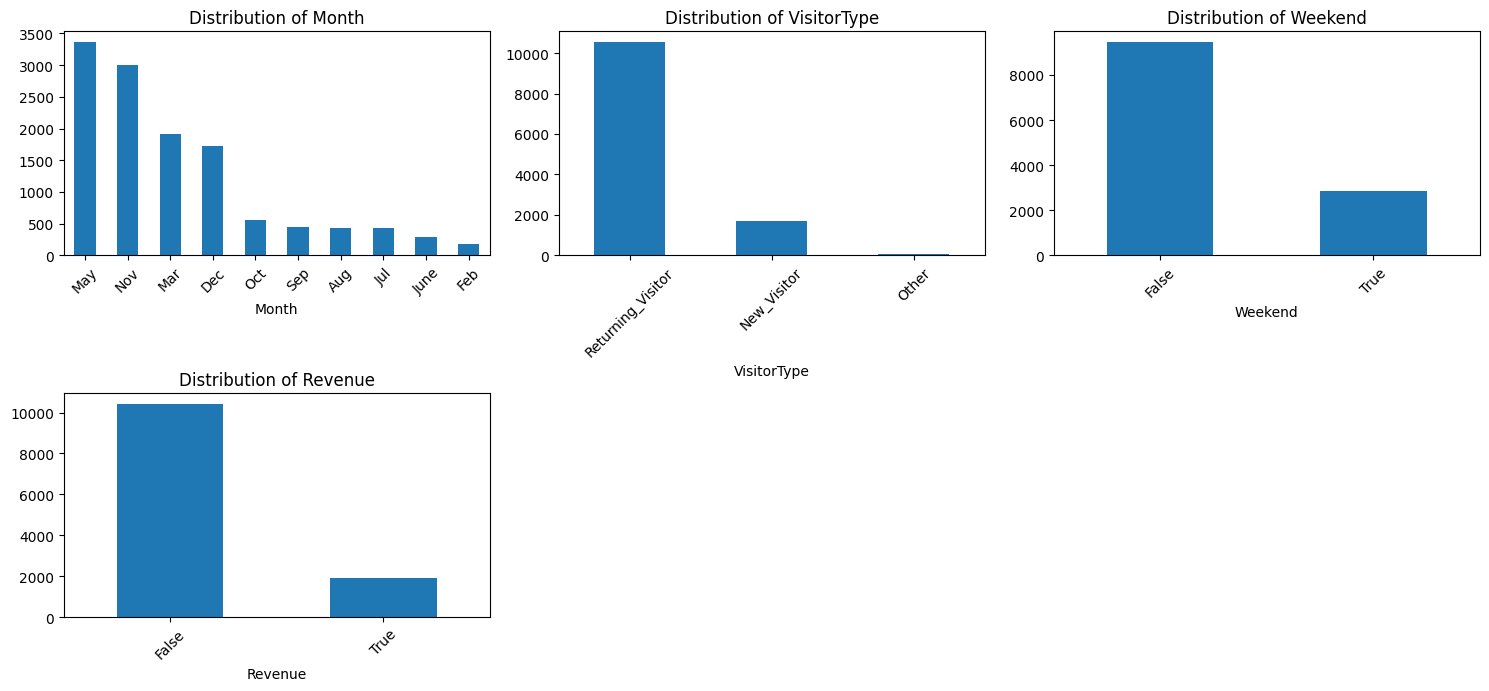

In [14]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    if i < len(axes):
        df[col].value_counts().plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'Distribution of {col}')
        axes[i].tick_params(axis='x', rotation=45)

for i in range(len(categorical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

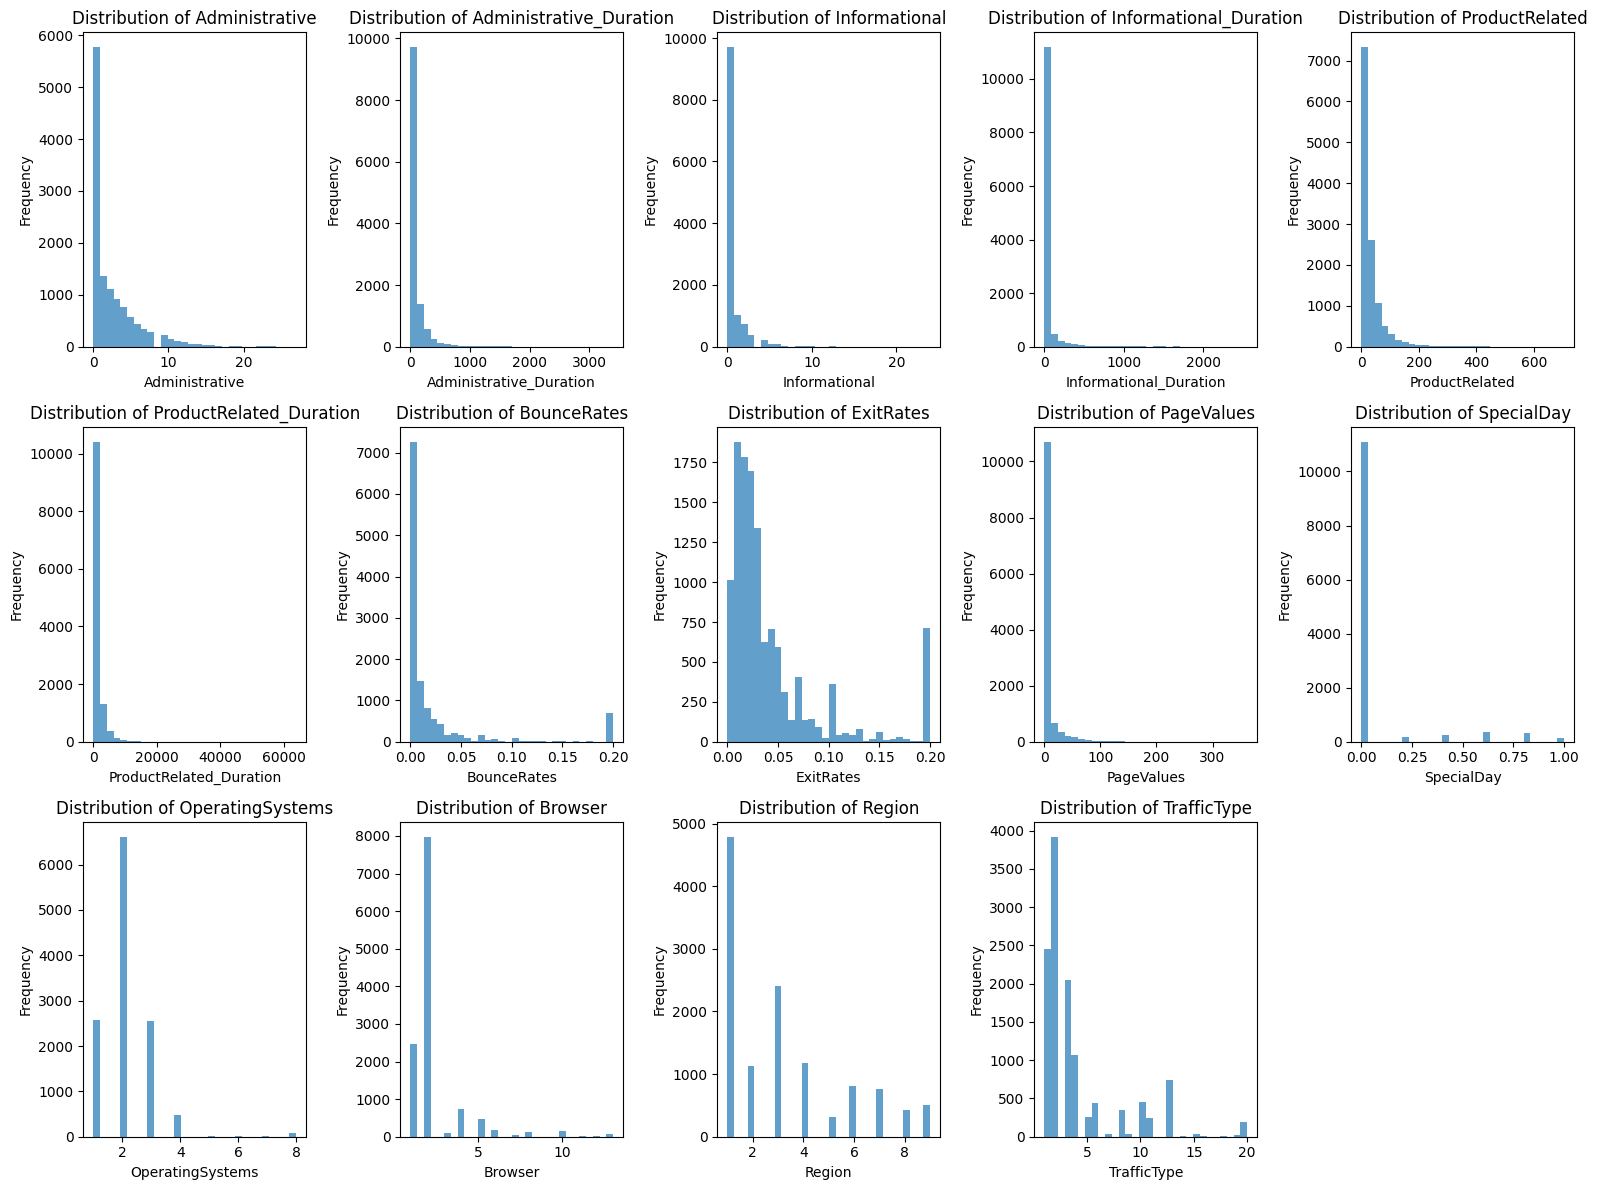

In [15]:
numerical_cols_except_revenue = [col for col in numerical_cols if col != 'Revenue']

fig, axes = plt.subplots(3, 5,figsize=(16, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols_except_revenue):
    if i < len(axes):
        axes[i].hist(df[col], bins=30, alpha=0.7)
        axes[i].set_title(f'Distribution of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')

for i in range(len(numerical_cols_except_revenue), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

#### Hasil analisis statistik deskriptif untuk fitur-fitur kategorikal 

- Beberapa fitur memiliki nilai yang telah di encoding seperti OperatingSystems, Browser, Region, dan TrafficType, sehingga apabila diperlukan interpretasi nilai maka diperlukan data tambahan.
- Mayoritas pengunjung berasal dari region wilayah 2 dan ketika berselancar di website menggunakan OperatingSystem jenis 2 dengan Browser jenis 1.
- Returning Visitor merupakan pengunjung yang paling dominan. Pada fitur VisitorType ini perlu dilakukan penanganan terhadap nilai Other.
- Terdapat dua bulan yang hilang pada fitur Month yaitu January dan April. Bulan Mei memiliki jumlah pengunjung terbanyak, lalu diikuti dengan bulan November.

#### Hasil analisis statistik deskriptif untuk fitur-fitur numerikal
- Distribusi data secara keseluruhan cenderung positively-skewed (Mean > Median).
- Administrative, Administrative_Duration, Informational, Informational_Duration, ProductRelated, ProductRelated_Duration, BounceRate, PageValues memiliki ekor distribusi yang pang panjang dengan nilai yang menumpuk disekitar angka 0.
- Dari kedua kondisi diatas dan dari analisa menggunakan boxplot mayoritas fitur memiliki outlier.

In [16]:
categorical_cols = ['Month', 'OperatingSystems', 'Browser', 'Region', 
                   'TrafficType', 'VisitorType', 'Weekend', 'Revenue']

numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational', 
                 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay']

## Target Variable Analysis

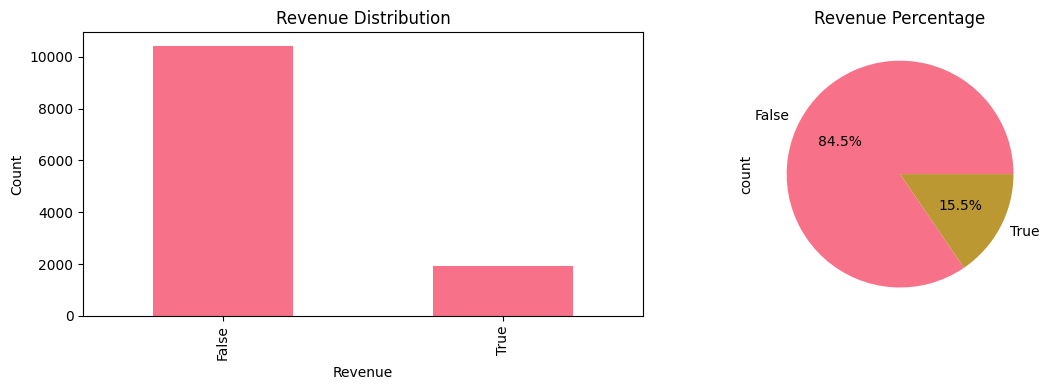

Revenue Distribution:
Revenue
False    10422
True      1908
Name: count, dtype: int64

Revenue Percentage:
Revenue
False    84.525547
True     15.474453
Name: proportion, dtype: float64


In [17]:
plt.style.use('default')
sns.set_palette("husl")

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
df['Revenue'].value_counts().plot(kind='bar')
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['Revenue'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Revenue Percentage')

plt.tight_layout()
plt.show()

print("Revenue Distribution:")
print(df['Revenue'].value_counts())
print("\nRevenue Percentage:")
print(df['Revenue'].value_counts(normalize=True) * 100)

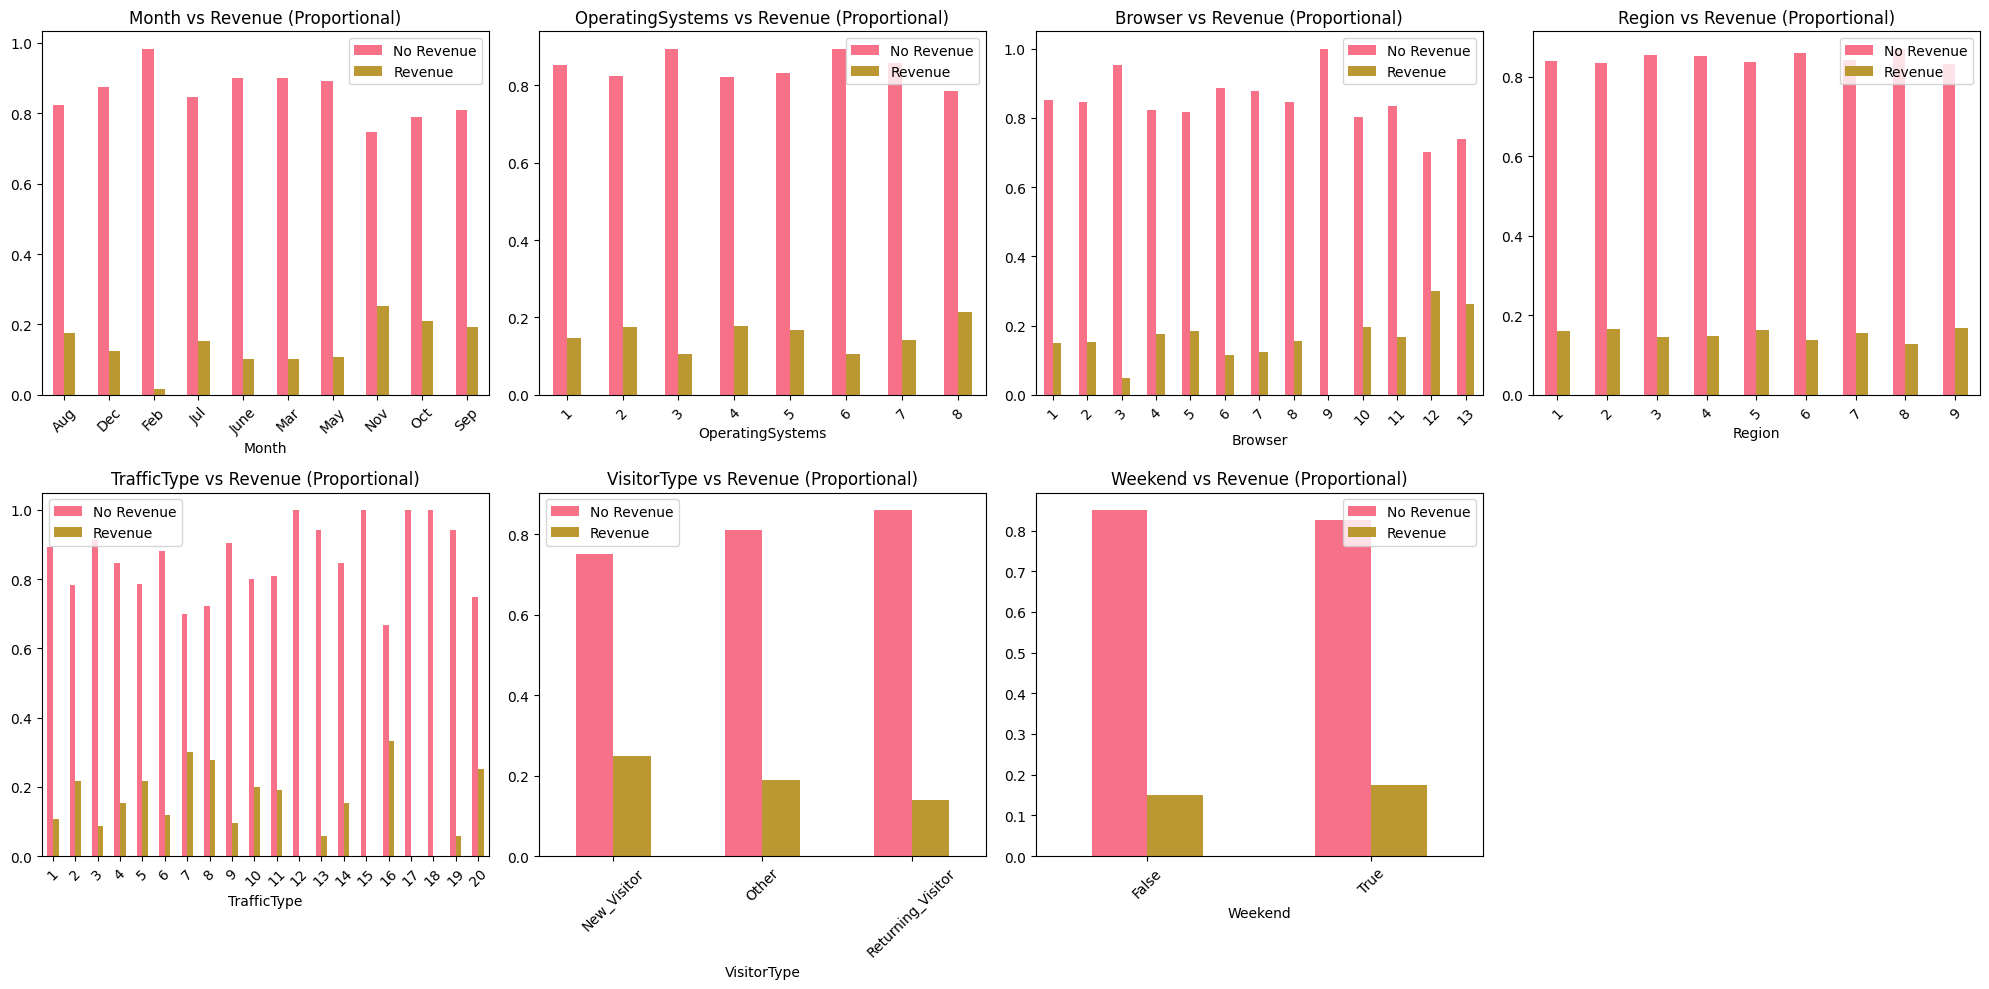

In [18]:
categorical_cols_no_revenue = [col for col in categorical_cols if col != 'Revenue']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.ravel()

for i, col in enumerate(categorical_cols_no_revenue):
    if i < len(axes):
        pd.crosstab(df[col], df['Revenue'], normalize='index').plot(kind='bar', ax=axes[i])
        axes[i].set_title(f'{col} vs Revenue (Proportional)')
        axes[i].legend(['No Revenue', 'Revenue'])
        axes[i].tick_params(axis='x', rotation=45)

for i in range(len(categorical_cols_no_revenue), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

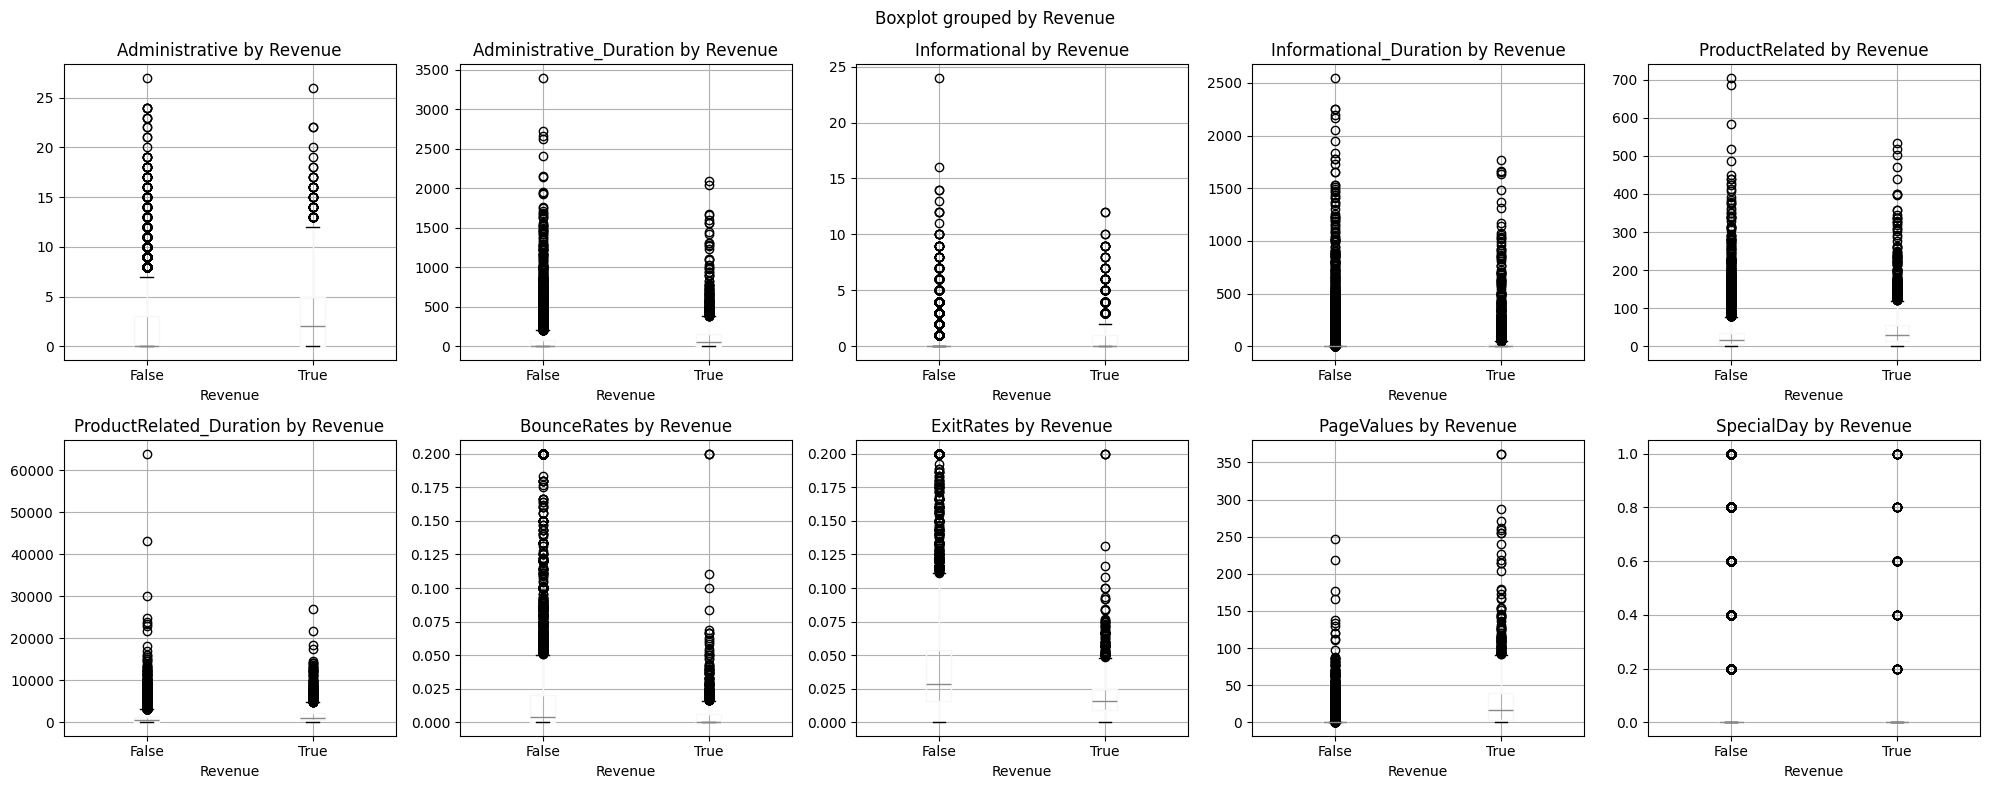

In [19]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        df.boxplot(column=col, by='Revenue', ax=axes[i])
        axes[i].set_title(f'{col} by Revenue')
        axes[i].set_xlabel('Revenue')

plt.tight_layout()
plt.show()

## Correlation Analysis

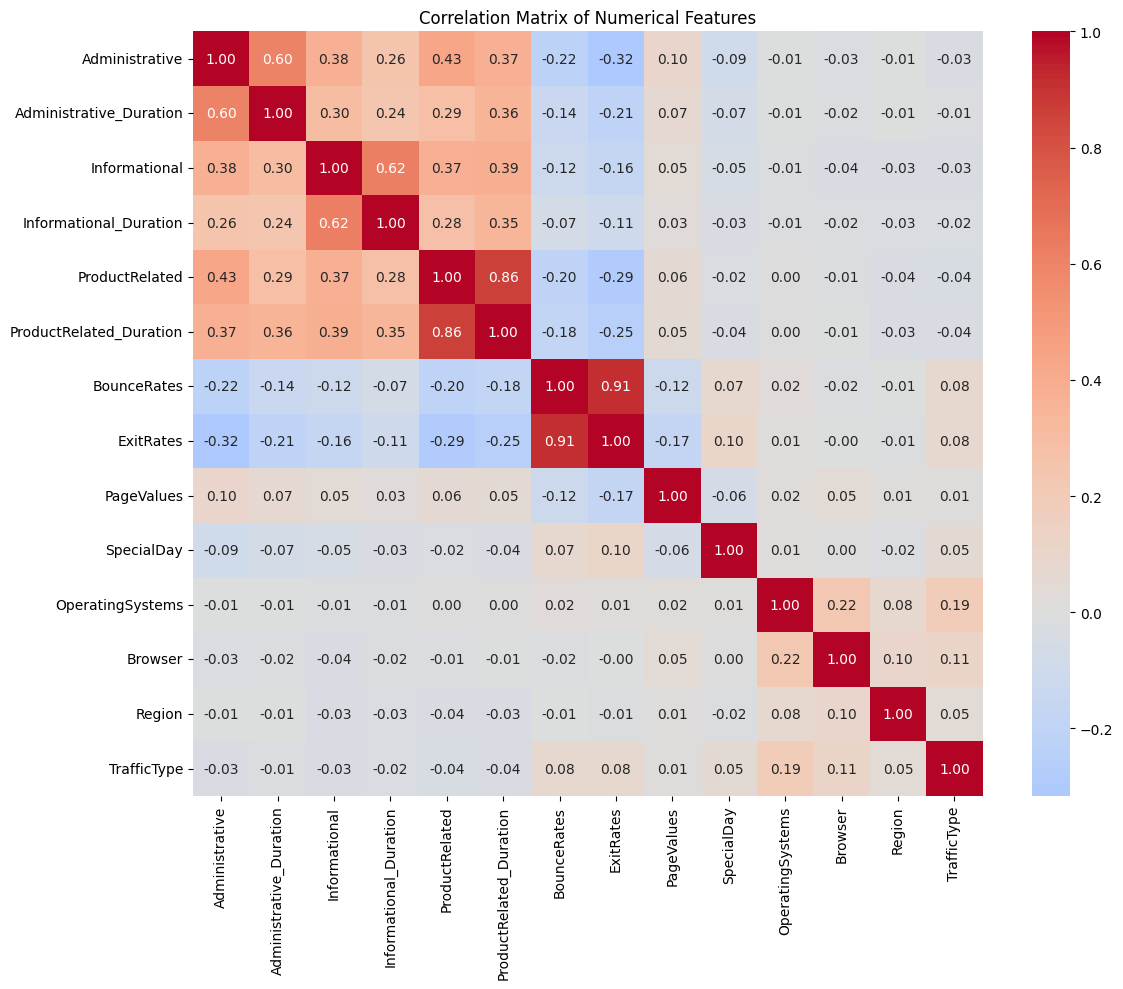

In [20]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

### Hasil analisis korelasi antar fitur
- Beberapa fitur yang memiliki multikorenialitas diantaranya adalah :
    1. ProductRelated dengan ProductRelated_Duration
    2. Adminisitrative dengan Adminisitrative_Duration
    3. Informational dengan Informational_Duration
    4. BounceRates dengan ExitRates


## Outlier Detection

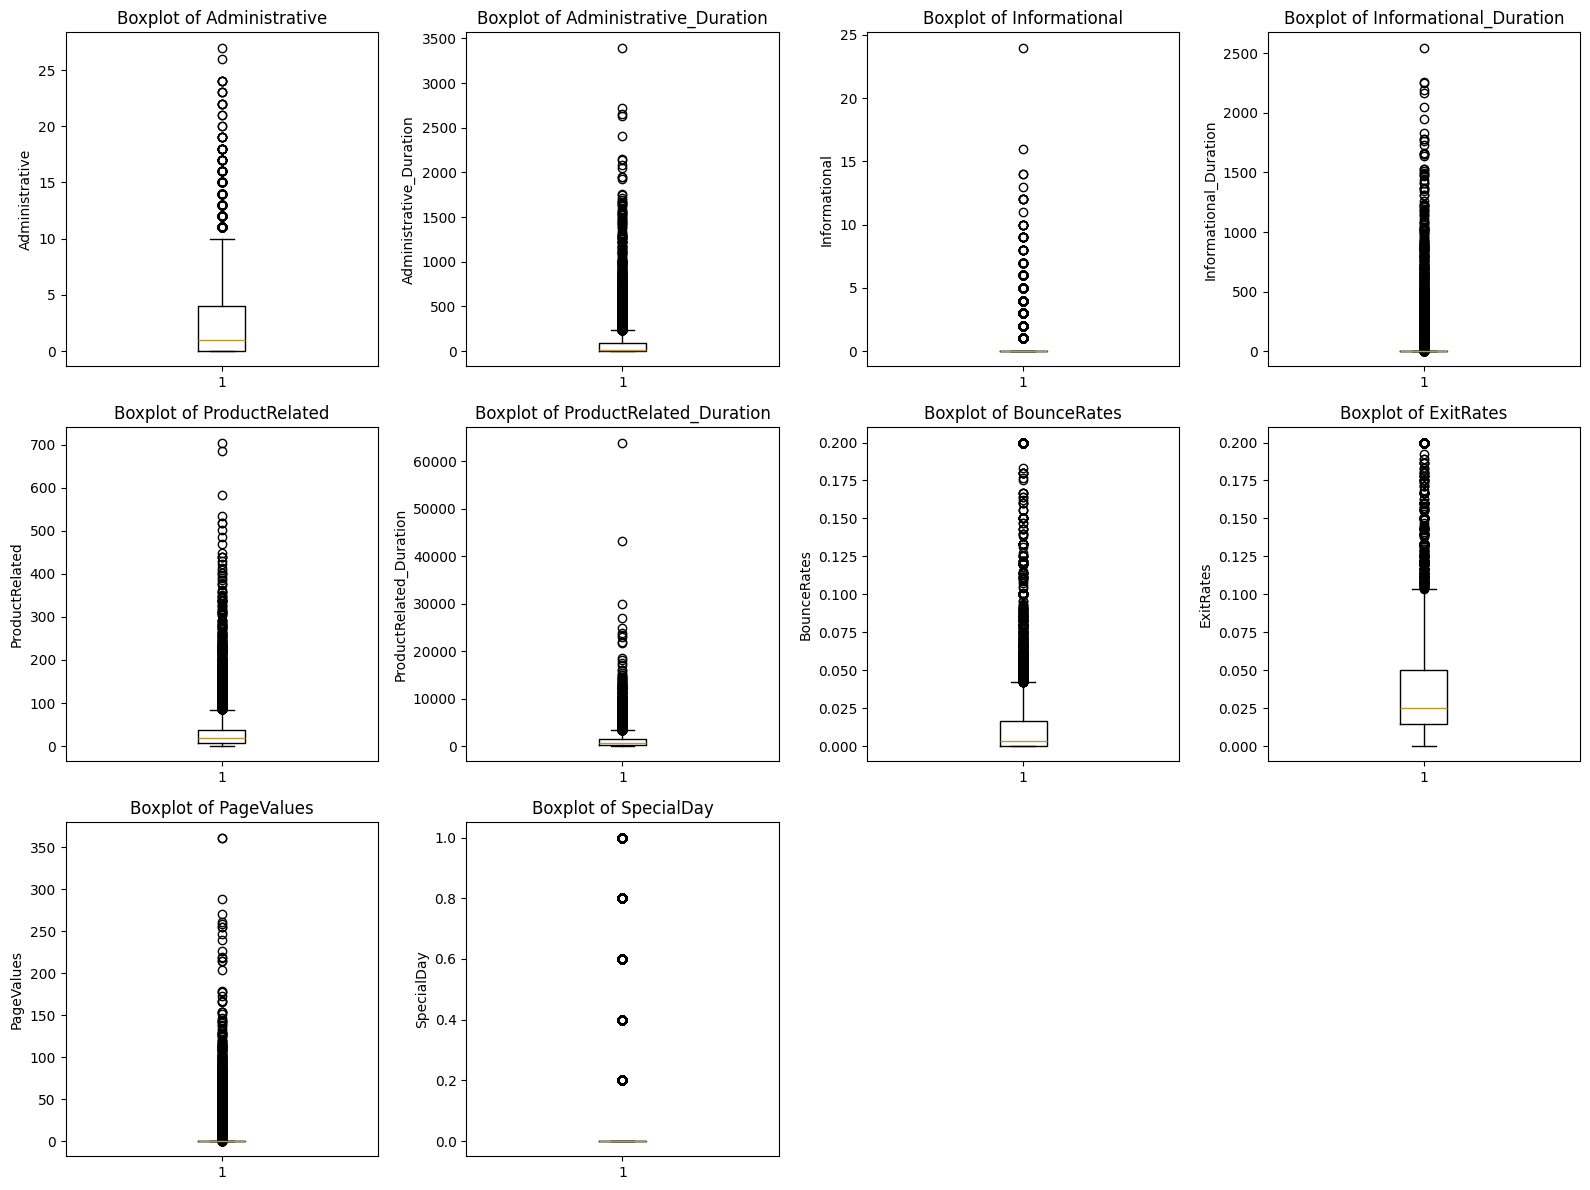

In [21]:
fig, axes = plt.subplots(3, 4, figsize=(16, 12))
axes = axes.ravel()

for i, col in enumerate(numerical_cols):
    if i < len(axes):
        axes[i].boxplot(df[col])
        axes[i].set_title(f'Boxplot of {col}')
        axes[i].set_ylabel(col)

# Hide unused subplots
for i in range(len(numerical_cols), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

## Session Behavior Analysis

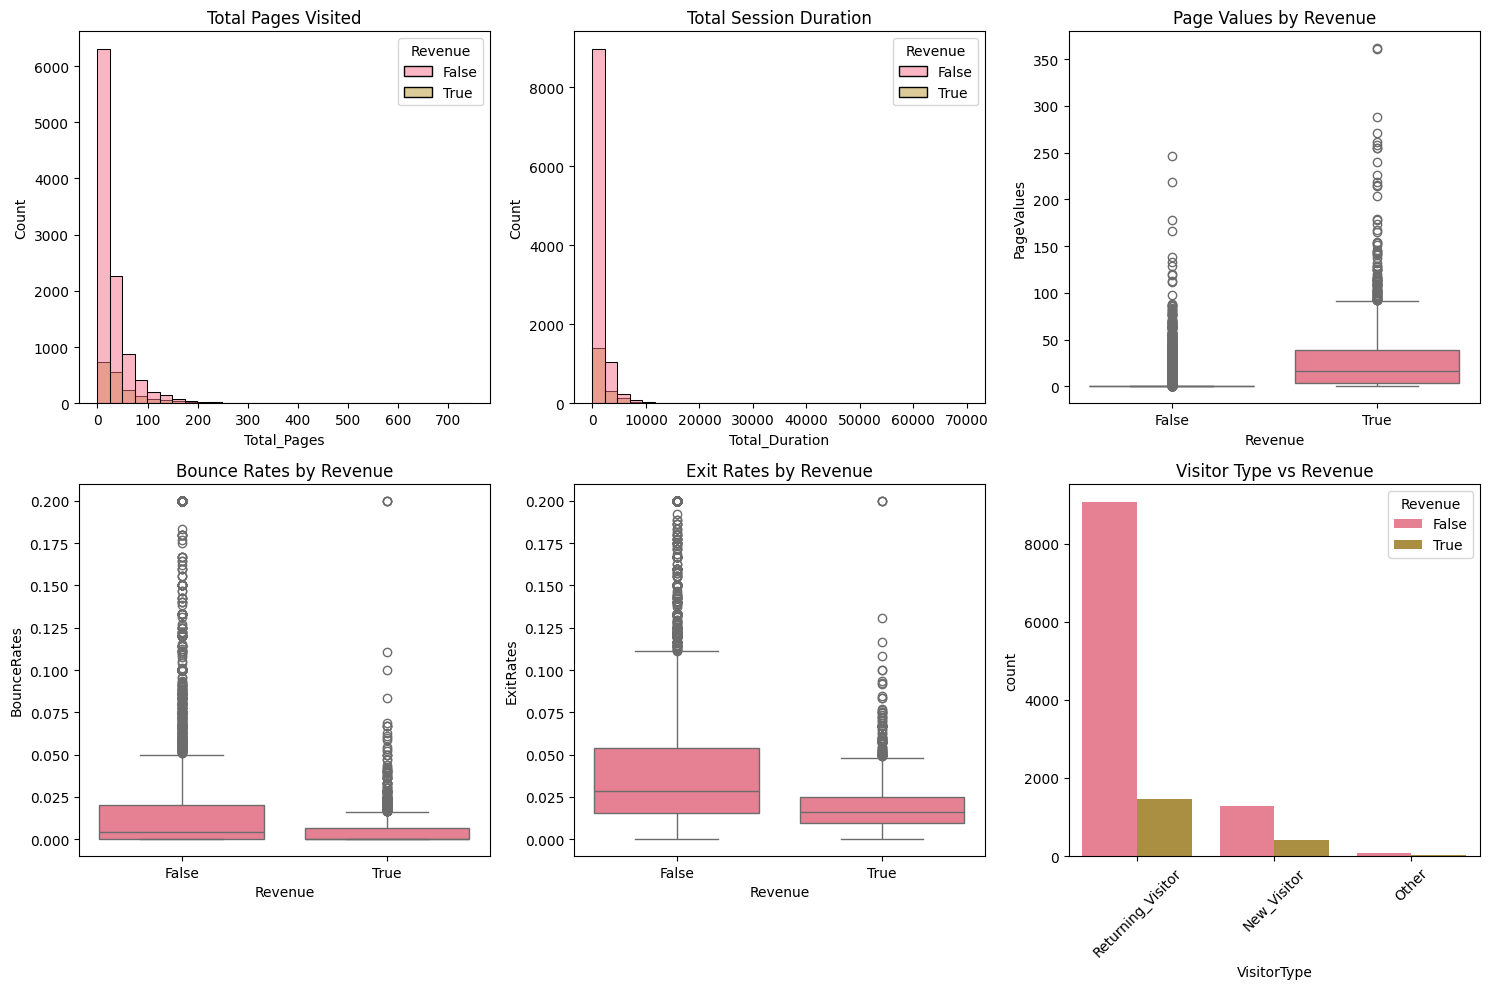

In [22]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
df['Total_Pages'] = df['Administrative'] + df['Informational'] + df['ProductRelated']
sns.histplot(data=df, x='Total_Pages', hue='Revenue', bins=30)
plt.title('Total Pages Visited')

plt.subplot(2, 3, 2)
df['Total_Duration'] = df['Administrative_Duration'] + df['Informational_Duration'] + df['ProductRelated_Duration']
sns.histplot(data=df, x='Total_Duration', hue='Revenue', bins=30)
plt.title('Total Session Duration')

plt.subplot(2, 3, 3)
sns.boxplot(data=df, x='Revenue', y='PageValues')
plt.title('Page Values by Revenue')

plt.subplot(2, 3, 4)
sns.boxplot(data=df, x='Revenue', y='BounceRates')
plt.title('Bounce Rates by Revenue')

plt.subplot(2, 3, 5)
sns.boxplot(data=df, x='Revenue', y='ExitRates')
plt.title('Exit Rates by Revenue')

plt.subplot(2, 3, 6)
sns.countplot(data=df, x='VisitorType', hue='Revenue')
plt.title('Visitor Type vs Revenue')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Statistical Tests

In [23]:
from scipy import stats

# T-test numerical features
print("T-test results for numerical features:")
print("="*50)

for col in numerical_cols:
    revenue_yes = df[df['Revenue'] == True][col]
    revenue_no = df[df['Revenue'] == False][col]
    
    t_stat, p_value = stats.ttest_ind(revenue_yes, revenue_no)
    print(f"{col}:")
    print(f"  T-statistic: {t_stat:.4f}")
    print(f"  P-value: {p_value:.4f}")
    print(f"  Significant: {'Yes' if p_value < 0.05 else 'No'}")
    print()

T-test results for numerical features:
Administrative:
  T-statistic: 15.5752
  P-value: 0.0000
  Significant: Yes

Administrative_Duration:
  T-statistic: 10.4369
  P-value: 0.0000
  Significant: Yes

Informational:
  T-statistic: 10.6185
  P-value: 0.0000
  Significant: Yes

Informational_Duration:
  T-statistic: 7.8299
  P-value: 0.0000
  Significant: Yes

ProductRelated:
  T-statistic: 17.8282
  P-value: 0.0000
  Significant: Yes

ProductRelated_Duration:
  T-statistic: 17.1180
  P-value: 0.0000
  Significant: Yes

BounceRates:
  T-statistic: -16.9226
  P-value: 0.0000
  Significant: Yes

ExitRates:
  T-statistic: -23.5008
  P-value: 0.0000
  Significant: Yes

PageValues:
  T-statistic: 62.8432
  P-value: 0.0000
  Significant: Yes

SpecialDay:
  T-statistic: -9.1695
  P-value: 0.0000
  Significant: Yes



# Data Preprocessing
---

## Handle Duplicate Data

In [24]:
df = df.drop_duplicates()
df.shape

(12205, 20)

## Encoding Categorical Variables

In [25]:
df['Weekend'] = df['Weekend'].astype(int)
df['Revenue'] = df['Revenue'].astype(int)

In [26]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

le = LabelEncoder()
df['VisitorType'] = le.fit_transform(df['VisitorType'])

In [27]:
month_map = {
    'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'June': 6,
    'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12
}
df['Month_num'] = df['Month'].map(month_map)

df['Month_sin'] = np.sin(2 * np.pi * df['Month_num'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month_num'] / 12)

df.drop(['Month', 'Month_num'], axis=1, inplace=True)

## Handling Outliers

In [28]:
updated_numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational', 
                         'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                         'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
                         'Month_sin', 'Month_cos'] 

for col in updated_numerical_cols:
    p1 = df[col].quantile(0.01)
    p99 = df[col].quantile(0.99)
    
    outliers_before = len(df[(df[col] < p1) | (df[col] > p99)])
    df[col] = df[col].clip(lower=p1, upper=p99)
    
    if outliers_before > 0:
        print(f"{col}: {outliers_before} outliers handled")

Administrative: 113 outliers handled
Administrative_Duration: 123 outliers handled
Informational: 83 outliers handled
Informational_Duration: 123 outliers handled
ProductRelated: 160 outliers handled
ProductRelated_Duration: 123 outliers handled
ExitRates: 122 outliers handled
PageValues: 123 outliers handled


In [29]:
X = df.drop('Revenue', axis=1) 
y = df['Revenue']              

## Feature Selection

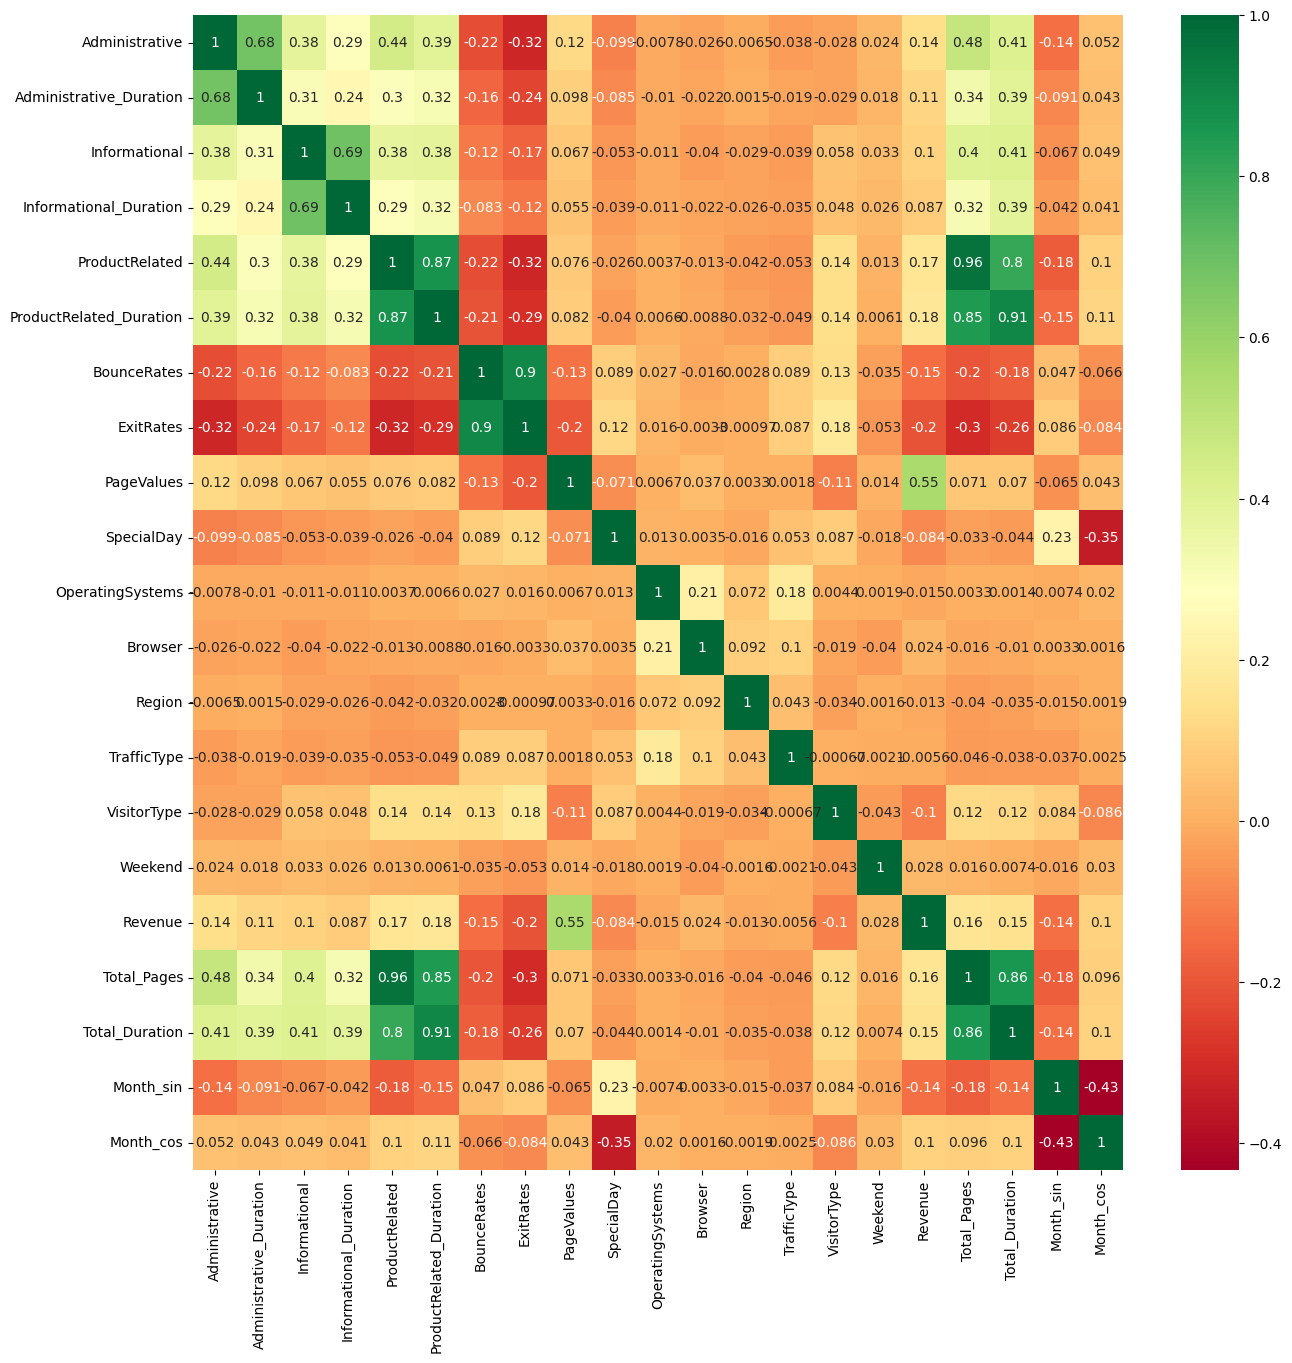

In [30]:
corrmat = df.loc[:, df.columns != 'revenue'].corr()
top_corr_features = corrmat.index 

plt.figure(figsize=(15,15)) 
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Fitur yang redundant diantaranya
- Administrative - Administrative_Duration <br>
- Informational - Informational_Duration <br>
- ProductRelated - ProductRelated_Duration <br>
- BounceRates - ExitRates <br>

Tiga teratas akan dibuat feature extraction untuk mendapatkan durasi tiap page-nya, sedangkan BounceRates - ExitRates, akan dipilih salah satu, yaitu ExitRates.


## Feature Engineering

In [31]:
df['Duration per Page Administrative'] = df['Administrative_Duration'] / df['Administrative']
df['Duration per Page Informational'] = df['Informational_Duration'] / df['Informational']
df['Duration per Page ProductRelated'] = df['ProductRelated_Duration'] / df['ProductRelated'] 

## Save Preprocessed Data

In [32]:
df.to_csv('cleaned.csv', index=False)

## Split Data

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=40, stratify=y
)

In [34]:
print(f"Final feature shape: {X.shape}")
print(f"Features: {X.columns.tolist()}")

Final feature shape: (12205, 20)
Features: ['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend', 'Total_Pages', 'Total_Duration', 'Month_sin', 'Month_cos']


## Scaling Features

In [35]:
updated_numerical_cols = ['Administrative', 'Administrative_Duration', 'Informational', 
                         'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
                         'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay',
                         'Month_sin', 'Month_cos']

scaler = StandardScaler()
scaler.fit(X_train[updated_numerical_cols])

for i, col in enumerate(updated_numerical_cols):
    print(f"  {col:<25}: mean={scaler.mean_[i]:8.3f}, std={scaler.scale_[i]:8.3f}")

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[updated_numerical_cols] = scaler.transform(X_train[updated_numerical_cols])
X_test_scaled[updated_numerical_cols] = scaler.transform(X_test[updated_numerical_cols])

  Administrative           : mean=   2.319, std=   3.207
  Administrative_Duration  : mean=  77.442, std= 143.554
  Informational            : mean=   0.500, std=   1.162
  Informational_Duration   : mean=  31.011, std= 105.897
  ProductRelated           : mean=  31.651, std=  38.698
  ProductRelated_Duration  : mean=1181.838, std=1569.303
  BounceRates              : mean=   0.020, std=   0.044
  ExitRates                : mean=   0.041, std=   0.045
  PageValues               : mean=   5.474, std=  14.901
  SpecialDay               : mean=   0.061, std=   0.198
  Month_sin                : mean=   0.046, std=   0.627
  Month_cos                : mean=   0.081, std=   0.773


In [36]:
train_stats = X_train_scaled[updated_numerical_cols].describe()
print(f"  Mean: {train_stats.loc['mean'].round(3).to_dict()}")
print(f"  Std:  {train_stats.loc['std'].round(3).to_dict()}")

test_stats = X_test_scaled[updated_numerical_cols].describe()
print(f"  Mean: {test_stats.loc['mean'].round(3).to_dict()}")
print(f"  Std:  {test_stats.loc['std'].round(3).to_dict()}")

X_train = X_train_scaled
X_test = X_test_scaled

  Mean: {'Administrative': 0.0, 'Administrative_Duration': -0.0, 'Informational': 0.0, 'Informational_Duration': 0.0, 'ProductRelated': -0.0, 'ProductRelated_Duration': 0.0, 'BounceRates': 0.0, 'ExitRates': -0.0, 'PageValues': 0.0, 'SpecialDay': -0.0, 'Month_sin': -0.0, 'Month_cos': 0.0}
  Std:  {'Administrative': 1.0, 'Administrative_Duration': 1.0, 'Informational': 1.0, 'Informational_Duration': 1.0, 'ProductRelated': 1.0, 'ProductRelated_Duration': 1.0, 'BounceRates': 1.0, 'ExitRates': 1.0, 'PageValues': 1.0, 'SpecialDay': 1.0, 'Month_sin': 1.0, 'Month_cos': 1.0}
  Mean: {'Administrative': -0.008, 'Administrative_Duration': -0.007, 'Informational': -0.021, 'Informational_Duration': -0.007, 'ProductRelated': -0.034, 'ProductRelated_Duration': -0.027, 'BounceRates': 0.031, 'ExitRates': 0.042, 'PageValues': 0.004, 'SpecialDay': 0.008, 'Month_sin': 0.038, 'Month_cos': -0.024}
  Std:  {'Administrative': 0.994, 'Administrative_Duration': 0.986, 'Informational': 0.983, 'Informational_Durat

# Model Machine Learning (Before SMOTE)
---

In [37]:
models_before_smote = {
    'Logistic Regression': LogisticRegression(random_state=40, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=40, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=40, n_estimators=100),
    'XGBoost': XGBClassifier(
        random_state=40,
        n_estimators=100,
        learning_rate=0.1,
        use_label_encoder=False,
        eval_metric='logloss'
    ),
    'Decision Tree': DecisionTreeClassifier(random_state=40, max_depth=10),
    'Naive Bayes': GaussianNB(),
    'ANN (MLP)': MLPClassifier(random_state=40, max_iter=500, hidden_layer_sizes=(100,50))
}

results_before_smote = {}
trained_models_before = {}

print("TRAINING AND EVALUATION RESULTS (BEFORE SMOTE):")
print("="*60)

for name, model in models_before_smote.items():
    try:
        print(f"\nTraining {name}...")
        
        cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
        
        results_before_smote[name] = {
            'CV_Mean': cv_scores.mean(),
            'CV_Std': cv_scores.std(),
            'Test_Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUC': auc
        }
        
        trained_models_before[name] = model
        
        print(f"  CV Score: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
        print(f"  Test Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-Score: {f1:.4f}")
        if auc:
            print(f"  AUC: {auc:.4f}")
        
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        print(f"  Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")

    except Exception as e:
        print(f"Error training {name}: {e}")
        continue

print(f"\nSuccessfully trained {len(results_before_smote)} models")

results_before_df = pd.DataFrame(results_before_smote).T
print("\nMODEL COMPARISON RESULTS (BEFORE SMOTE):")
print("="*70)
print(results_before_df.round(4))


TRAINING AND EVALUATION RESULTS (BEFORE SMOTE):

Training Logistic Regression...
  CV Score: 0.8838 (+/- 0.0100)
  Test Accuracy: 0.8828
  Precision: 0.7430
  Recall: 0.3827
  F1-Score: 0.5052
  AUC: 0.8901
  Confusion Matrix: TN=4018, FP=101, FN=471, TP=292

Training Random Forest...
  CV Score: 0.9024 (+/- 0.0131)
  Test Accuracy: 0.9041
  Precision: 0.7383
  Recall: 0.5990
  F1-Score: 0.6614
  AUC: 0.9205
  Confusion Matrix: TN=3957, FP=162, FN=306, TP=457

Training Gradient Boosting...
  CV Score: 0.9037 (+/- 0.0125)
  Test Accuracy: 0.9009
  Precision: 0.7123
  Recall: 0.6134
  F1-Score: 0.6592
  AUC: 0.9263
  Confusion Matrix: TN=3930, FP=189, FN=295, TP=468

Training XGBoost...
  CV Score: 0.9040 (+/- 0.0108)
  Test Accuracy: 0.9002
  Precision: 0.7123
  Recall: 0.6068
  F1-Score: 0.6553
  AUC: 0.9262
  Confusion Matrix: TN=3932, FP=187, FN=300, TP=463

Training Decision Tree...
  CV Score: 0.8813 (+/- 0.0175)
  Test Accuracy: 0.8857
  Precision: 0.6446
  Recall: 0.5990
  F1-Sco

In [38]:
metrics_for_plot = ['Test_Accuracy', 'Precision', 'Recall', 'F1-Score']
best_model_before = results_before_df['F1-Score'].idxmax()
best_scores = results_before_df.loc[best_model_before, metrics_for_plot].values

print(f"\nDETAILED CLASSIFICATION REPORT - {best_model_before.upper()}:")
print("="*60)
best_model_obj = trained_models_before[best_model_before]
y_pred_best_before = best_model_obj.predict(X_test)
print(classification_report(y_test, y_pred_best_before, 
                          target_names=['No Purchase', 'Purchase'], 
                          digits=4))



DETAILED CLASSIFICATION REPORT - RANDOM FOREST:
              precision    recall  f1-score   support

 No Purchase     0.9282    0.9607    0.9442      4119
    Purchase     0.7383    0.5990    0.6614       763

    accuracy                         0.9041      4882
   macro avg     0.8333    0.7798    0.8028      4882
weighted avg     0.8985    0.9041    0.9000      4882



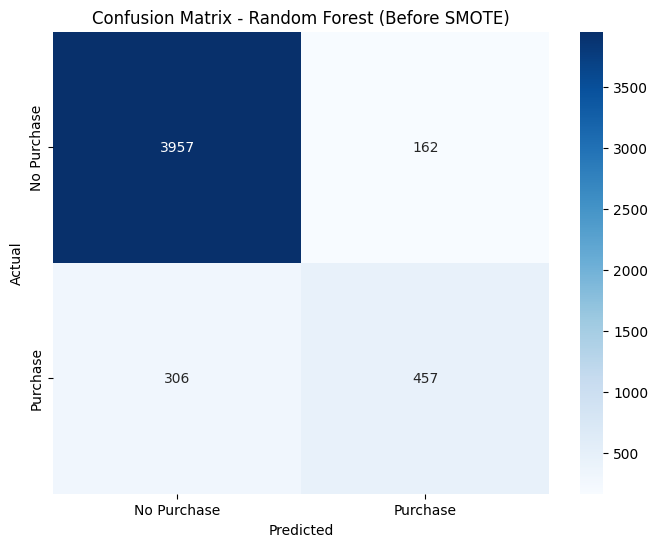

In [39]:
cm_best_before = confusion_matrix(y_test, y_pred_best_before)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_before, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['No Purchase', 'Purchase'], 
            yticklabels=['No Purchase', 'Purchase'])
plt.title(f'Confusion Matrix - {best_model_before} (Before SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# SMOTE
---

In [40]:
try:
    from imblearn.over_sampling import SMOTE
except ImportError:
    print("Installing imbalanced-learn...")
    import subprocess
    import sys
    subprocess.check_call([sys.executable, "-m", "pip", "install", "imbalanced-learn"])
    from imblearn.over_sampling import SMOTE

class_counts = y_train.value_counts()
print(f"Original Training Set Distribution:")
print(f"  Class 0 (No Purchase): {class_counts[0]:,} ({class_counts[0]/len(y_train)*100:.1f}%)")
print(f"  Class 1 (Purchase): {class_counts[1]:,} ({class_counts[1]/len(y_train)*100:.1f}%)")

imbalance_ratio = class_counts[0] / class_counts[1]
print(f"\nImbalance Ratio: {imbalance_ratio:.2f}:1")

if imbalance_ratio > 3:
    print("⚠️  Significant class imbalance detected! Applying SMOTE...")
    apply_smote = True
else:
    print("✅ Mild imbalance, SMOTE optional.")
    apply_smote = False

Original Training Set Distribution:
  Class 0 (No Purchase): 6,178 (84.4%)
  Class 1 (Purchase): 1,145 (15.6%)

Imbalance Ratio: 5.40:1
⚠️  Significant class imbalance detected! Applying SMOTE...


In [41]:
if apply_smote:
    print("\nApplying SMOTE to training data only...")
    
    smote = SMOTE(
        sampling_strategy='auto', 
        random_state=40,
        k_neighbors=5
    )
    
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
    
    # Convert back to DataFrame and Series for consistency
    X_train_smote = pd.DataFrame(X_train_smote, columns=X_train.columns)
    y_train_smote = pd.Series(y_train_smote, name=y_train.name)
    
    print(f"\n✅ SMOTE Applied Successfully!")
    print(f"After SMOTE - Training set:")
    smote_counts = y_train_smote.value_counts()
    print(f"  Class 0: {smote_counts[0]:,} ({smote_counts[0]/len(y_train_smote)*100:.1f}%)")
    print(f"  Class 1: {smote_counts[1]:,} ({smote_counts[1]/len(y_train_smote)*100:.1f}%)")
    print(f"  Total samples: {len(y_train):,} → {len(y_train_smote):,}")
    
    # Test data remains unchanged
    print(f"\nTest set (unchanged):")
    test_counts = y_test.value_counts()
    print(f"  Class 0: {test_counts[0]:,} ({test_counts[0]/len(y_test)*100:.1f}%)")
    print(f"  Class 1: {test_counts[1]:,} ({test_counts[1]/len(y_test)*100:.1f}%)")
    print(f"  Total samples: {len(y_test):,}")
    
else:
    X_train_smote, y_train_smote = X_train.copy(), y_train.copy()
    print("\nUsing original training data (no SMOTE applied)")

print(f"\nFINAL DATA SUMMARY:")
print(f"  Training (SMOTE): {X_train_smote.shape[0]} samples")
print(f"  Test (Original):  {X_test.shape[0]} samples")
print(f"  Features:         {X_train_smote.shape[1]}")


Applying SMOTE to training data only...

✅ SMOTE Applied Successfully!
After SMOTE - Training set:
  Class 0: 6,178 (50.0%)
  Class 1: 6,178 (50.0%)
  Total samples: 7,323 → 12,356

Test set (unchanged):
  Class 0: 4,119 (84.4%)
  Class 1: 763 (15.6%)
  Total samples: 4,882

FINAL DATA SUMMARY:
  Training (SMOTE): 12356 samples
  Test (Original):  4882 samples
  Features:         20


# Model Machine Learning (After SMOTE)
---

In [42]:
models_after_smote = {
    'Logistic Regression': LogisticRegression(random_state=40, max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=40, n_estimators=100),
    'Gradient Boosting': GradientBoostingClassifier(random_state=40, n_estimators=100),
    'XGBoost': XGBClassifier(
        random_state=40,
        n_estimators=100,
        learning_rate=0.1,
        use_label_encoder=False,
        eval_metric='logloss'
    ),
    'Decision Tree': DecisionTreeClassifier(random_state=40, max_depth=10),
    'Naive Bayes': GaussianNB(),
    'ANN (MLP)': MLPClassifier(random_state=40, max_iter=500, hidden_layer_sizes=(100,50))
}

results_after_smote = {}
trained_models_after = {}
all_predictions_after = {}

print("TRAINING AND EVALUATION RESULTS (AFTER SMOTE):")
print("="*60)

for name, model in models_after_smote.items():
    try:
        print(f"\nTraining {name}...")
        
        cv_scores = cross_val_score(model, X_train_smote, y_train_smote, cv=5, scoring='accuracy', n_jobs=-1)
        
        model.fit(X_train_smote, y_train_smote)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
        
        all_predictions_after[name] = y_pred
        
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, zero_division=0)
        recall = recall_score(y_test, y_pred, zero_division=0)
        f1 = f1_score(y_test, y_pred, zero_division=0)
        auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
        
        results_after_smote[name] = {
            'CV_Mean': cv_scores.mean(),
            'CV_Std': cv_scores.std(),
            'Test_Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1-Score': f1,
            'AUC': auc
        }
        
        trained_models_after[name] = model
        
        print(f"  Cross-Validation: {cv_scores.mean():.4f} (+/- {cv_scores.std()*2:.4f})")
        print(f"  Test Accuracy: {accuracy:.4f}")
        print(f"  Precision: {precision:.4f}")
        print(f"  Recall: {recall:.4f}")
        print(f"  F1-Score: {f1:.4f}")
        if auc:
            print(f"  AUC: {auc:.4f}")
        
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        print(f"  Confusion Matrix: TN={tn}, FP={fp}, FN={fn}, TP={tp}")
        
    except Exception as e:
        print(f"  Error training {name}: {e}")
        import traceback
        traceback.print_exc()
        continue

print(f"\nSuccessfully trained {len(results_after_smote)} models")

results_after_df = pd.DataFrame(results_after_smote).T
print(f"\nMODEL COMPARISON RESULTS (AFTER SMOTE):")
print("="*70)
print(results_after_df.round(4))

TRAINING AND EVALUATION RESULTS (AFTER SMOTE):

Training Logistic Regression...
  Cross-Validation: 0.8534 (+/- 0.0620)
  Test Accuracy: 0.8646
  Precision: 0.5528
  Recall: 0.6999
  F1-Score: 0.6177
  AUC: 0.8870
  Confusion Matrix: TN=3687, FP=432, FN=229, TP=534

Training Random Forest...
  Cross-Validation: 0.9336 (+/- 0.1184)
  Test Accuracy: 0.8945
  Precision: 0.6558
  Recall: 0.6841
  F1-Score: 0.6697
  AUC: 0.9180
  Confusion Matrix: TN=3845, FP=274, FN=241, TP=522

Training Gradient Boosting...
  Cross-Validation: 0.9180 (+/- 0.1521)
  Test Accuracy: 0.8941
  Precision: 0.6478
  Recall: 0.7064
  F1-Score: 0.6759
  AUC: 0.9220
  Confusion Matrix: TN=3826, FP=293, FN=224, TP=539

Training XGBoost...
  Cross-Validation: 0.9159 (+/- 0.1847)
  Test Accuracy: 0.8943
  Precision: 0.6569
  Recall: 0.6776
  F1-Score: 0.6671
  AUC: 0.9264
  Confusion Matrix: TN=3849, FP=270, FN=246, TP=517

Training Decision Tree...
  Cross-Validation: 0.9118 (+/- 0.1199)
  Test Accuracy: 0.8744
  Prec

In [43]:
metrics_for_plot = ['Test_Accuracy', 'Precision', 'Recall', 'F1-Score']
best_model_after = results_after_df['F1-Score'].idxmax()
best_scores = results_after_df.loc[best_model_after, metrics_for_plot].values

print(f"\nDETAILED CLASSIFICATION REPORT - {best_model_after.upper()}:")
print("="*60)
best_model_obj = trained_models_after[best_model_after]
y_pred_best_after = best_model_obj.predict(X_test)
print(classification_report(y_test, y_pred_best_after, 
                          target_names=['No Purchase', 'Purchase'], 
                          digits=4))


DETAILED CLASSIFICATION REPORT - GRADIENT BOOSTING:
              precision    recall  f1-score   support

 No Purchase     0.9447    0.9289    0.9367      4119
    Purchase     0.6478    0.7064    0.6759       763

    accuracy                         0.8941      4882
   macro avg     0.7963    0.8176    0.8063      4882
weighted avg     0.8983    0.8941    0.8959      4882



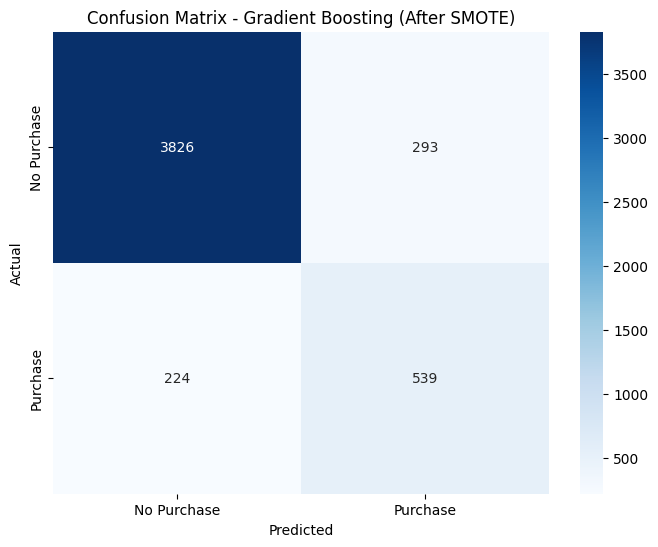

In [44]:
cm_best_after = confusion_matrix(y_test, y_pred_best_after)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_best_after, annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['No Purchase', 'Purchase'], 
            yticklabels=['No Purchase', 'Purchase'])
plt.title(f'Confusion Matrix - {best_model_after} (After SMOTE)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Hyperparameter Tuning
---

In [47]:
import time

from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

rfr_param_grid_small={
'n_estimators': [100,200,500,1000],
  'max_features': ['sqrt','log2'],
  'max_depth': [10],
  'min_samples_split': [2,5,10],
  'min_samples_leaf': [1,2,4],
  'bootstrap': [True, False]
}

print("Parameter grid for Random Forest:")
for param, values in rfr_param_grid_small.items():
    print(f"  {param}: {values}")

rfr_base = RandomForestClassifier(random_state=40, n_estimators=100)

print("\n🔍 Starting GridSearchCV...")
start_time = time.time()

rfr_grid_search = GridSearchCV(
    estimator=rfr_base,
    param_grid=rfr_param_grid_small,
    cv=3,  
    scoring='f1',  
    n_jobs=1,      
    verbose=1
)

rfr_grid_search.fit(X_train, y_train)

end_time = time.time()
print(f"\nGrid Search completed in {end_time - start_time:.2f} seconds")

best_rfr_params = rfr_grid_search.best_params_
best_rfr_model = rfr_grid_search.best_estimator_
best_cv_score = rfr_grid_search.best_score_

print(f"\nBEST HYPERPARAMETERS:")
print("="*40)
for param, value in best_rfr_params.items():
    print(f"  {param}: {value}")

print(f"\n📊 Best CV F1-Score: {best_cv_score:.4f}")

Parameter grid for Random Forest:
  n_estimators: [100, 200, 500, 1000]
  max_features: ['sqrt', 'log2']
  max_depth: [10]
  min_samples_split: [2, 5, 10]
  min_samples_leaf: [1, 2, 4]
  bootstrap: [True, False]

🔍 Starting GridSearchCV...
Fitting 3 folds for each of 144 candidates, totalling 432 fits

Grid Search completed in 1066.89 seconds

BEST HYPERPARAMETERS:
  bootstrap: False
  max_depth: 10
  max_features: sqrt
  min_samples_leaf: 1
  min_samples_split: 5
  n_estimators: 100

📊 Best CV F1-Score: 0.6653


In [48]:
import time

from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV

gb_param_grid_small = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.05, 0.1, 0.2],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

print("Parameter grid for Gradient Boosting:")
for param, values in gb_param_grid_small.items():
    print(f"  {param}: {values}")

gb_base = GradientBoostingClassifier(random_state=40)

print("\n🔍 Starting GridSearchCV...")
start_time = time.time()

gb_grid_search = GridSearchCV(
    estimator=gb_base,
    param_grid=gb_param_grid_small,
    cv=3,  
    scoring='f1',  
    n_jobs=1,      
    verbose=1
)

gb_grid_search.fit(X_train_smote, y_train_smote)

end_time = time.time()
print(f"\nGrid Search completed in {end_time - start_time:.2f} seconds")

best_gb_params = gb_grid_search.best_params_
best_gb_model = gb_grid_search.best_estimator_
best_cv_score = gb_grid_search.best_score_

print(f"\nBEST HYPERPARAMETERS:")
print("="*40)
for param, value in best_gb_params.items():
    print(f"  {param}: {value}")

print(f"\n📊 Best CV F1-Score: {best_cv_score:.4f}")

Parameter grid for Gradient Boosting:
  n_estimators: [100, 200]
  max_depth: [3, 5, 7]
  learning_rate: [0.05, 0.1, 0.2]
  min_samples_split: [2, 5]
  min_samples_leaf: [1, 2]

🔍 Starting GridSearchCV...
Fitting 3 folds for each of 72 candidates, totalling 216 fits

Grid Search completed in 1019.66 seconds

BEST HYPERPARAMETERS:
  learning_rate: 0.05
  max_depth: 5
  min_samples_leaf: 2
  min_samples_split: 2
  n_estimators: 100

📊 Best CV F1-Score: 0.9211


In [49]:
y_pred_tuned = best_gb_model.predict(X_test)
y_pred_proba_tuned = best_gb_model.predict_proba(X_test)[:, 1]

tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
tuned_precision = precision_score(y_test, y_pred_tuned)
tuned_recall = recall_score(y_test, y_pred_tuned)
tuned_f1 = f1_score(y_test, y_pred_tuned)
tuned_auc = roc_auc_score(y_test, y_pred_proba_tuned)

original_model = models_after_smote[best_model_after]
y_pred_original = original_model.predict(X_test)
y_pred_proba_original = original_model.predict_proba(X_test)[:, 1]

original_accuracy = accuracy_score(y_test, y_pred_original)
original_precision = precision_score(y_test, y_pred_original)
original_recall = recall_score(y_test, y_pred_original)
original_f1 = f1_score(y_test, y_pred_original)
original_auc = roc_auc_score(y_test, y_pred_proba_original)

comparison_data = {
    'Original GB': [original_accuracy, original_precision, original_recall, original_f1, original_auc],
    'Tuned GB': [tuned_accuracy, tuned_precision, tuned_recall, tuned_f1, tuned_auc],
    'Improvement': [tuned_accuracy - original_accuracy, 
                   tuned_precision - original_precision,
                   tuned_recall - original_recall,
                   tuned_f1 - original_f1,
                   tuned_auc - original_auc]
}

comparison_df = pd.DataFrame(comparison_data, 
                           index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'])

print("PERFORMANCE COMPARISON:")
print(comparison_df.round(4))

print(f"\nIMPROVEMENTS:")
for metric in comparison_df.index:
    improvement = comparison_df.loc[metric, 'Improvement']
    if improvement > 0:
        print(f"  {metric}: +{improvement:.4f}")
    elif improvement < 0:
        print(f"  {metric}: {improvement:.4f}")
    else:
        print(f"  {metric}: No change")

PERFORMANCE COMPARISON:
           Original GB  Tuned GB  Improvement
Accuracy        0.8941    0.8935      -0.0006
Precision       0.6478    0.6441      -0.0037
Recall          0.7064    0.7117       0.0052
F1-Score        0.6759    0.6762       0.0004
AUC             0.9220    0.9255       0.0035

IMPROVEMENTS:
  Accuracy: -0.0006
  Precision: -0.0037
  Recall: +0.0052
  F1-Score: +0.0004
  AUC: +0.0035


In [50]:
y_pred_tuned = best_gb_model.predict(X_test)
y_pred_proba_tuned = best_gb_model.predict_proba(X_test)[:, 1]

tuned_accuracy = accuracy_score(y_test, y_pred_tuned)
tuned_precision = precision_score(y_test, y_pred_tuned)
tuned_recall = recall_score(y_test, y_pred_tuned)
tuned_f1 = f1_score(y_test, y_pred_tuned)
tuned_auc = roc_auc_score(y_test, y_pred_proba_tuned)

original_model = models_after_smote[best_model_after]
y_pred_original = original_model.predict(X_test)
y_pred_proba_original = original_model.predict_proba(X_test)[:, 1]

original_accuracy = accuracy_score(y_test, y_pred_original)
original_precision = precision_score(y_test, y_pred_original)
original_recall = recall_score(y_test, y_pred_original)
original_f1 = f1_score(y_test, y_pred_original)
original_auc = roc_auc_score(y_test, y_pred_proba_original)

comparison_data = {
    'Original GB': [original_accuracy, original_precision, original_recall, original_f1, original_auc],
    'Tuned GB': [tuned_accuracy, tuned_precision, tuned_recall, tuned_f1, tuned_auc],
    'Improvement': [tuned_accuracy - original_accuracy, 
                   tuned_precision - original_precision,
                   tuned_recall - original_recall,
                   tuned_f1 - original_f1,
                   tuned_auc - original_auc]
}

comparison_df = pd.DataFrame(comparison_data, 
                           index=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC'])

print("PERFORMANCE COMPARISON:")
print(comparison_df.round(4))

print(f"\nIMPROVEMENTS:")
for metric in comparison_df.index:
    improvement = comparison_df.loc[metric, 'Improvement']
    if improvement > 0:
        print(f"  {metric}: +{improvement:.4f}")
    elif improvement < 0:
        print(f"  {metric}: {improvement:.4f}")
    else:
        print(f"  {metric}: No change")

PERFORMANCE COMPARISON:
           Original GB  Tuned GB  Improvement
Accuracy        0.8941    0.8935      -0.0006
Precision       0.6478    0.6441      -0.0037
Recall          0.7064    0.7117       0.0052
F1-Score        0.6759    0.6762       0.0004
AUC             0.9220    0.9255       0.0035

IMPROVEMENTS:
  Accuracy: -0.0006
  Precision: -0.0037
  Recall: +0.0052
  F1-Score: +0.0004
  AUC: +0.0035


# Feature Importance
---

TOP 15 MOST IMPORTANT FEATURES:
----------------------------------------
 1. PageValues                0.7758
 2. Month_sin                 0.0497
 3. Month_cos                 0.0437
 4. VisitorType               0.0209
 5. Total_Duration            0.0177
 6. Administrative            0.0159
 7. Total_Pages               0.0139
 8. ProductRelated            0.0130
 9. Informational             0.0096
10. ExitRates                 0.0075
11. BounceRates               0.0072
12. ProductRelated_Duration   0.0069
13. Administrative_Duration   0.0059
14. Region                    0.0028
15. Informational_Duration    0.0025


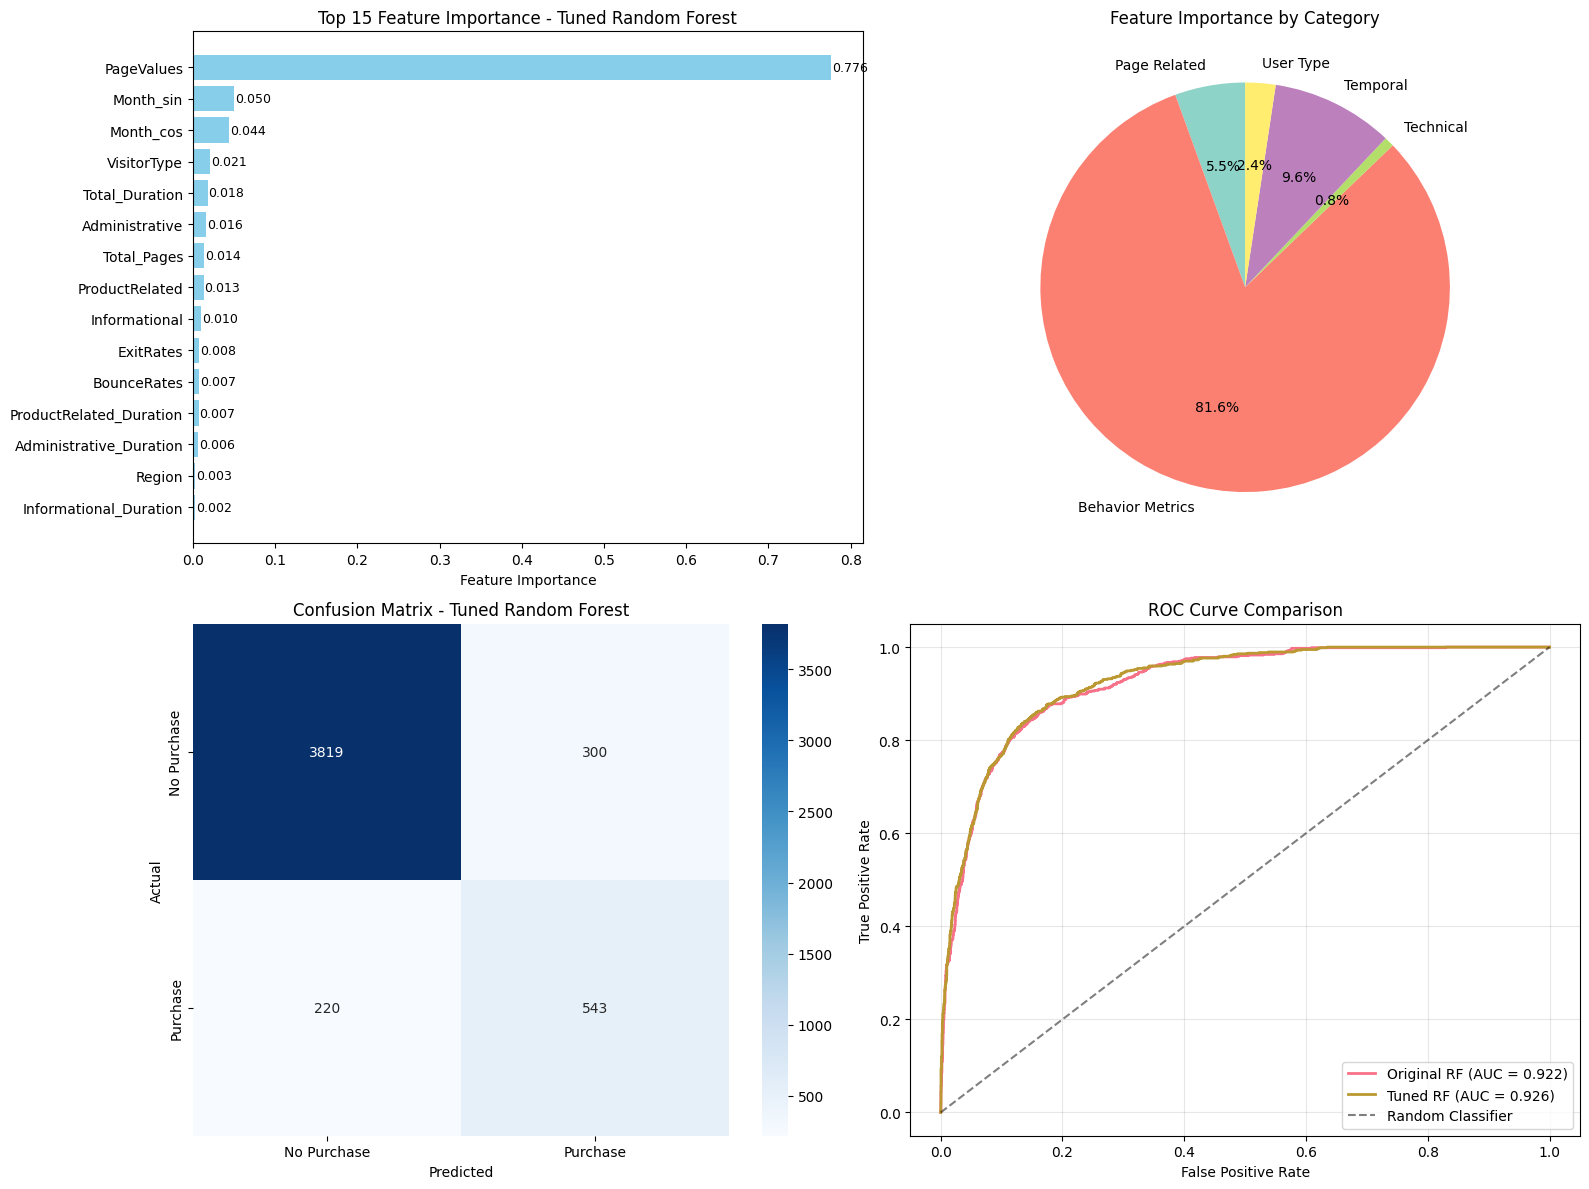

In [51]:
feature_importance = best_gb_model.feature_importances_
feature_names = X.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importance,
    'Rank': range(1, len(feature_names) + 1)
}).sort_values('Importance', ascending=False).reset_index(drop=True)

print("TOP 15 MOST IMPORTANT FEATURES:")
print("-" * 40)
for i in range(min(15, len(importance_df))):
    feature = importance_df.iloc[i]['Feature']
    importance = importance_df.iloc[i]['Importance']
    rank = i + 1
    print(f"{rank:2d}. {feature:<25} {importance:.4f}")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

top_15_features = importance_df.head(15)
bars = axes[0,0].barh(range(len(top_15_features)), top_15_features['Importance'], color='skyblue')
axes[0,0].set_yticks(range(len(top_15_features)))
axes[0,0].set_yticklabels(top_15_features['Feature'])
axes[0,0].set_xlabel('Feature Importance')
axes[0,0].set_title('Top 15 Feature Importance - Tuned Random Forest')
axes[0,0].invert_yaxis()

for i, bar in enumerate(bars):
    width = bar.get_width()
    axes[0,0].text(width + 0.001, bar.get_y() + bar.get_height()/2, 
                   f'{width:.3f}', ha='left', va='center', fontsize=9)

# Feature importance by category
feature_groups = {
    'Page Related': ['Administrative', 'Administrative_Duration', 'Informational', 
                    'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration'],
    'Behavior Metrics': ['BounceRates', 'ExitRates', 'PageValues'],
    'Technical': ['OperatingSystems', 'Browser', 'Region', 'TrafficType'],
    'Temporal': ['Month_sin', 'Month_cos', 'SpecialDay'],
    'User Type': ['VisitorType', 'Weekend'],
    'Engineered Features': ['Duration per Page Administrative', 
                           'Duration per Page Informational',
                           'Duration per Page ProductRelated']
}

category_importance = {}
for category, features in feature_groups.items():
    category_features = [f for f in features if f in feature_names]
    if category_features:
        category_total = importance_df[importance_df['Feature'].isin(category_features)]['Importance'].sum()
        category_importance[category] = category_total

# Plot category importance
categories = list(category_importance.keys())
importances = list(category_importance.values())
colors = plt.cm.Set3(np.linspace(0, 1, len(categories)))

wedges, texts, autotexts = axes[0,1].pie(importances, labels=categories, autopct='%1.1f%%', 
                                         colors=colors, startangle=90)
axes[0,1].set_title('Feature Importance by Category')

# Confusion Matrix for Tuned Model
cm_tuned = confusion_matrix(y_test, y_pred_tuned)
sns.heatmap(cm_tuned, annot=True, fmt='d', cmap='Blues', ax=axes[1,0],
            xticklabels=['No Purchase', 'Purchase'], 
            yticklabels=['No Purchase', 'Purchase'])
axes[1,0].set_title('Confusion Matrix - Tuned Random Forest')
axes[1,0].set_xlabel('Predicted')
axes[1,0].set_ylabel('Actual')

# ROC Curve Comparison
fpr_original, tpr_original, _ = roc_curve(y_test, y_pred_proba_original)
fpr_tuned, tpr_tuned, _ = roc_curve(y_test, y_pred_proba_tuned)

axes[1,1].plot(fpr_original, tpr_original, label=f'Original RF (AUC = {original_auc:.3f})', linewidth=2)
axes[1,1].plot(fpr_tuned, tpr_tuned, label=f'Tuned RF (AUC = {tuned_auc:.3f})', linewidth=2)
axes[1,1].plot([0, 1], [0, 1], 'k--', alpha=0.5, label='Random Classifier')
axes[1,1].set_xlabel('False Positive Rate')
axes[1,1].set_ylabel('True Positive Rate')
axes[1,1].set_title('ROC Curve Comparison')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()